# Customer Brand Recommendation (Naïve Bayes)

This project predicts whether a customer will recommend a brand using Machine Learning.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('customer_data.csv')
le = LabelEncoder()
data['Recommend'] = le.fit_transform(data['Recommend'])

X = data.drop('Recommend', axis=1)
y = data['Recommend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



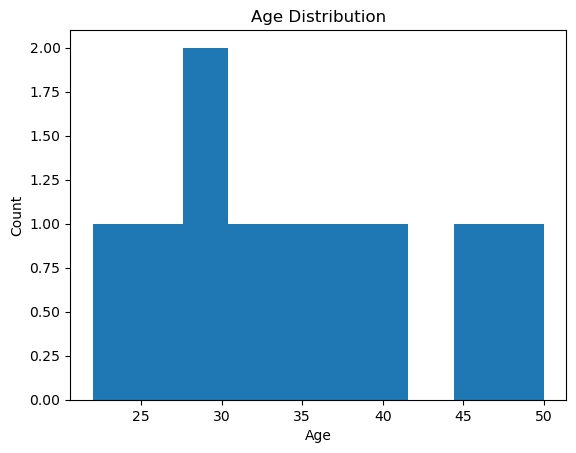

In [3]:
#Exploratory Data Analysis (EDA)
#Age distribution

import matplotlib.pyplot as plt

plt.hist(data['Age'], bins=10)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Index(['Age', 'AnnualIncome', 'PurchaseAmount', 'PurchaseFrequency',
       'LoyaltyScore', 'Recommend'],
      dtype='object')


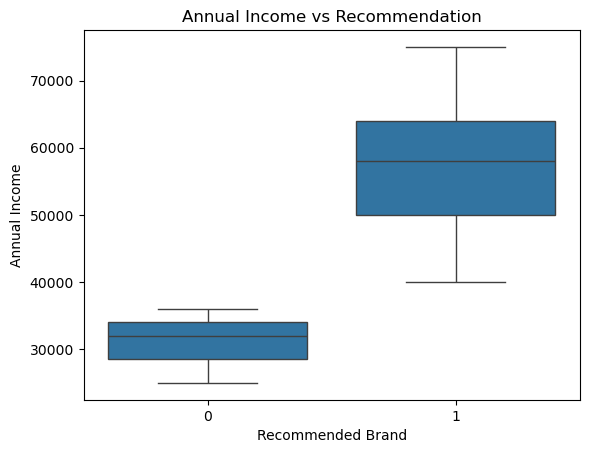

In [13]:
#Annual Income vs Recommendation (BOXPLOT)
#Shows how income affects brand recommendation.

print(data.columns)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.boxplot(x='Recommend', y='AnnualIncome', data=data)
plt.title('Annual Income vs Recommendation')
plt.xlabel('Recommended Brand')
plt.ylabel('Annual Income')
plt.show()


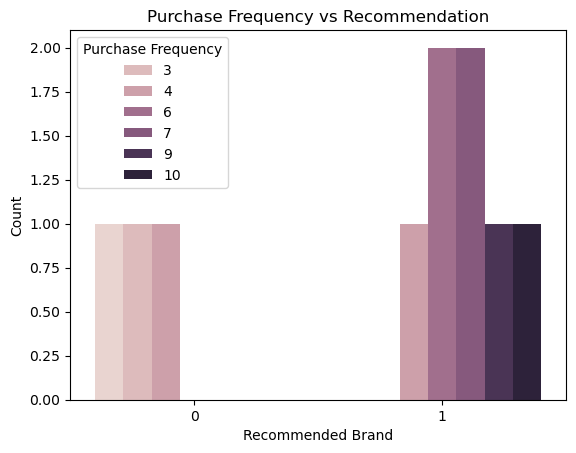

In [14]:
#Purchase Frequency vs Recommendation (COUNTPLOT)
#Shows how often customers purchase before recommendation.

plt.figure()
sns.countplot(x='Recommend', hue='PurchaseFrequency', data=data)
plt.title('Purchase Frequency vs Recommendation')
plt.xlabel('Recommended Brand')
plt.ylabel('Count')
plt.legend(title='Purchase Frequency')
plt.show()




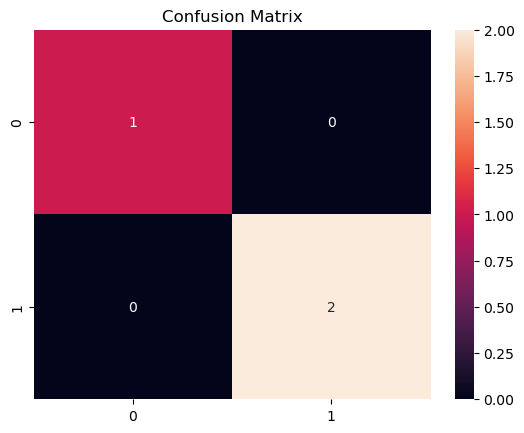

In [8]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()